In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import f1_score,roc_curve,auc
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Load the dataset

In [55]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [56]:
print(x_train.shape)
print(y_train.shape)
 
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [57]:
X = np.concatenate((x_train, x_test))
X.shape

(70000, 28, 28)

In [58]:
y = np.concatenate([y_train, y_test])
y.shape

(70000,)

### Dividing dataset into a training set (80%), an evaluation set (10%) and a test set (10%)

In [59]:
train_ratio = 0.9
test_ratio = 0.1

# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio)

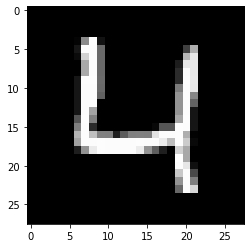

In [60]:
plt.imshow(x_train[0], cmap='gray')

In [66]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


# images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [67]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [68]:
def predict_model(model, callbacks = [],batch_size=128, epochs = 4):
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", "Precision","Recall"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.11, callbacks=callbacks)
    score = model.evaluate(x_test, y_test, verbose=0)
    y_pred = model.predict(x_test)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("Test precision:", score[2])
    print("Test recall:", score[3])
    #print(y_test)
    
    y_pred = np.argmax(y_pred,axis=1)
    #y_pred = keras.utils.to_categorical(y_pred, num_classes)
    y_test1 = np.argmax(y_test,axis=1)
    
    print("Test f1 score:", f1_score(y_test1,y_pred,average='micro'))
    for i in range(10):
        temp_pred = [1 if x==i else 0 for x in y_pred]
        temp_test = [1 if x==i else 0 for x in y_test1]
        fpr, tpr, thresholds =roc_curve(temp_test,temp_pred)

        print("Test AUC for digit:",i, auc(fpr, tpr))
    
    # list all data in history
    #print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [22]:
# simple early stopping
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 3)

### Basic Fully Connected Multi-layer Network

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 28, 28, 32)        64        
_________________________________________________________________
dense_24 (Dense)             (None, 28, 28, 64)        2112      
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               6422656   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total params: 6,426,122
Trainable params: 6,426,122
Non-trainable params: 0
____________________________________________

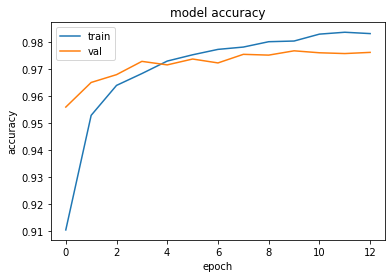

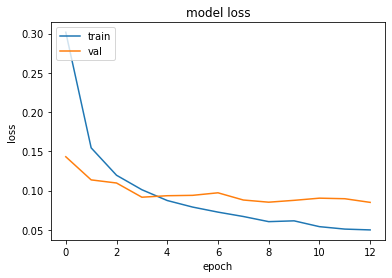

In [23]:
model_fc = keras.Sequential([
    layers.Dense(32, activation="relu",input_shape=(28,28,1)),
    layers.Dense(64, activation="relu"),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(.25),
    layers.Dense(10, activation="softmax")
]) 
model_fc.summary()
predict_model(model_fc, [es], epochs=100)

### TODO More complex model 
- demonstrate  the  effects  of  changing  the  number  of layers  (+1)  
- the  number  of  units  per  layer  (+1),  learning  with  different  learning  rates  (+1)  
- using different  optimization  techniques,  by  providing Accuracy, Precision,  Recall,  F1, and AUC  for  ROC curves for each network. 

### Basic Multi-layer CNN

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)               

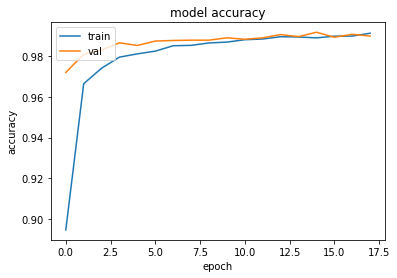

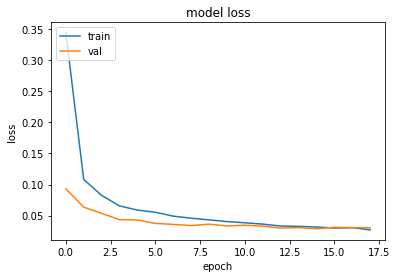

In [24]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D (2,2),  
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D (2,2),   

    layers.Flatten(),
    layers.Dropout(.5),
    layers.Dense(10, activation="softmax")
])
model.summary()
#model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
predict_model(model, [es], epochs=100)

### TODO More complex model 
- demonstrate  the  effects  of  changing  the  number  of layers  (+1)  
- the  number  of  units  per  layer  (+1),  learning  with  different  learning  rates  (+1)  
- using different  optimization  techniques,  by  providing Accuracy, Precision,  Recall,  F1, and AUC  for  ROC curves for each network. 

### TODO Demonstrate the effects for different values of dropout

## Document the performance of a published network (LeNet5, VGG, Yolo, etc) for recognizing MNIST Digits

### LeNet5

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_32 (Dense)             (None, 84)              

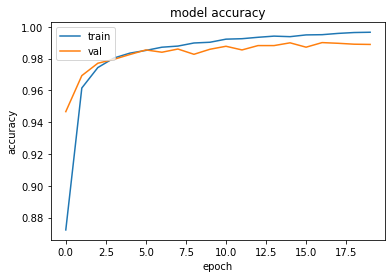

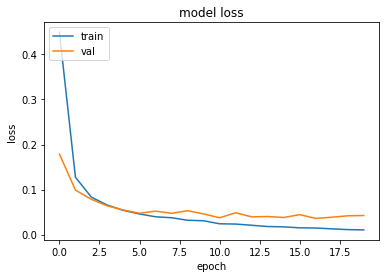

In [28]:
lenet5 = keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.AveragePooling2D(),
    
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.AveragePooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(units=120, activation='relu'),
    layers.Dense(units=84, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

lenet5.summary()
predict_model(lenet5, [es], epochs=100)

### TODO Use your best network to build a real time system to recognize your own hand written digits

### SHAP Explainer
https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/deep_explainer/Front%20Page%20DeepExplainer%20MNIST%20Example.html

In [71]:
import shap
import numpy as np